In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import paths

# TODO: Deleteme after developing
%load_ext autoreload
%autoreload 2

## Params

In [2]:
ORG_NAME = 'Decentraland'
SPLITS_FREQ = 'W-THU'  # Split weekly
LAST_FOLDS = 10  # Use just last 10 splits
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR: str = '2023-07-13'

# Specific to this notebook
MODEL_NAMES = [
    'itemknn',
    'userknn',
    'plnsim',
]
NEEDED_COLS = [
    'time_train',
    'time_rec',
    'time_eval',
]

In [3]:
# Parameters
EXECUTION_ID = "2024-09-04T10:00"
MIN_BATCH_SIZE = 4
ORG_NAME = "Magic Square"
SPLITS_FREQ = "7d"
LAST_FOLDS = 10
SPLITS_NORMALIZE = True
LAST_FOLD_DATE_STR = "2023-07-17"


## Read baselines

In [4]:
dfo = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfo

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073796
2023-05-15,0.760618,0.673102,0.544402,0.364865,0.253024,0.037954,0.760618,0.801015,0.822257,0.867315,...,0.967028,1.000000,1.0,0.409379,0.740299,0.842660,0.924507,0.933445,0.933445,0.187275
2023-05-22,0.384449,0.395248,0.390065,0.400000,0.403888,0.091404,0.384449,0.430780,0.453456,0.513717,...,0.486307,0.680727,1.0,0.233058,0.346432,0.430699,0.591339,0.704521,0.807491,0.359745
2023-05-29,0.663484,0.610581,0.599284,0.528401,0.422753,0.078162,0.663484,0.691477,0.724434,0.767998,...,0.784751,0.881077,1.0,0.255909,0.420624,0.520333,0.711331,0.770070,0.805022,0.681002
2023-06-05,0.461538,0.476744,0.473524,0.443470,0.407454,0.077299,0.461538,0.519599,0.542190,0.600242,...,0.618569,0.823529,1.0,0.240077,0.369050,0.502098,0.657049,0.740110,0.768742,0.614539
2023-06-12,0.365923,0.345515,0.325012,0.303939,0.277108,0.061315,0.365923,0.380373,0.393237,0.440937,...,0.462305,0.625590,1.0,0.258619,0.438177,0.538640,0.695650,0.762311,0.800159,1.320038
2023-06-19,0.204834,0.203827,0.194381,0.335257,0.364371,0.070205,0.204834,0.215350,0.221142,0.399090,...,0.533650,0.806996,1.0,0.216863,0.424963,0.558378,0.559247,0.670773,0.683865,2.411973
2023-06-26,0.385518,0.382948,0.385116,0.366309,0.362677,0.076611,0.385518,0.398537,0.410503,0.483073,...,0.532342,0.758679,1.0,0.186059,0.396966,0.548723,0.564100,0.641772,0.655257,2.193587
2023-07-03,0.887229,0.860173,0.742857,0.486255,0.382496,0.069115,0.887229,0.894841,0.889882,0.875543,...,0.826636,0.893322,1.0,0.237124,0.586151,0.639244,0.721740,0.758684,0.786692,3.759019


In [5]:
dfp = paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)
dfp

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-08,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.074538
2023-05-15,1.0,0.782497,0.607722,0.370656,0.253024,0.037954,1.0,1.0,1.0,1.0,...,0.992512,1.000000,1.0,0.468267,0.812136,0.921449,0.992512,1.000000,1.0,0.197850
2023-05-22,1.0,0.817855,0.731317,0.611015,0.523254,0.091404,1.0,1.0,1.0,1.0,...,0.839672,0.935367,1.0,0.352570,0.557710,0.667638,0.839672,0.935367,1.0,0.531404
2023-05-29,1.0,0.819809,0.735800,0.594153,0.470406,0.078162,1.0,1.0,1.0,1.0,...,0.896998,0.966749,1.0,0.360239,0.578927,0.708316,0.896998,0.966749,1.0,0.659303
2023-06-05,1.0,0.854800,0.784079,0.622361,0.485689,0.077299,1.0,1.0,1.0,1.0,...,0.908877,0.978702,1.0,0.316806,0.550148,0.705823,0.908877,0.978702,1.0,0.825589
2023-06-12,1.0,0.887676,0.744376,0.511818,0.382376,0.061315,1.0,1.0,1.0,1.0,...,0.944731,0.980528,1.0,0.321864,0.667537,0.828073,0.944731,0.980528,1.0,1.535238
2023-06-19,1.0,0.912890,0.853233,0.617311,0.460463,0.070205,1.0,1.0,1.0,1.0,...,0.940824,0.993919,1.0,0.259352,0.543766,0.754918,0.940824,0.993919,1.0,2.979295
2023-06-26,1.0,0.937647,0.843647,0.672042,0.499073,0.076611,1.0,1.0,1.0,1.0,...,0.935607,0.990562,1.0,0.233677,0.534086,0.695149,0.935607,0.990562,1.0,2.950225
2023-07-03,1.0,0.944084,0.804113,0.550952,0.418139,0.069115,1.0,1.0,1.0,1.0,...,0.929452,0.971749,1.0,0.260007,0.622987,0.811148,0.929452,0.971749,1.0,4.269313


## Get other model results

In [6]:
x = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
x

,precision@1,precision@3,precision@5,precision@10,precision@15,precision@100,ndcg@1,ndcg@3,ndcg@5,ndcg@10,...,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.073796,openpop
2023-05-15,0.760618,0.673102,0.544402,0.364865,0.253024,0.037954,0.760618,0.801015,0.822257,0.867315,...,1.000000,1.0,0.409379,0.740299,0.842660,0.924507,0.933445,0.933445,0.187275,openpop
2023-05-22,0.384449,0.395248,0.390065,0.400000,0.403888,0.091404,0.384449,0.430780,0.453456,0.513717,...,0.680727,1.0,0.233058,0.346432,0.430699,0.591339,0.704521,0.807491,0.359745,openpop
2023-05-29,0.663484,0.610581,0.599284,0.528401,0.422753,0.078162,0.663484,0.691477,0.724434,0.767998,...,0.881077,1.0,0.255909,0.420624,0.520333,0.711331,0.770070,0.805022,0.681002,openpop
2023-06-05,0.461538,0.476744,0.473524,0.443470,0.407454,0.077299,0.461538,0.519599,0.542190,0.600242,...,0.823529,1.0,0.240077,0.369050,0.502098,0.657049,0.740110,0.768742,0.614539,openpop
2023-06-12,0.365923,0.345515,0.325012,0.303939,0.277108,0.061315,0.365923,0.380373,0.393237,0.440937,...,0.625590,1.0,0.258619,0.438177,0.538640,0.695650,0.762311,0.800159,1.320038,openpop
2023-06-19,0.204834,0.203827,0.194381,0.335257,0.364371,0.070205,0.204834,0.215350,0.221142,0.399090,...,0.806996,1.0,0.216863,0.424963,0.558378,0.559247,0.670773,0.683865,2.411973,openpop
2023-06-26,0.385518,0.382948,0.385116,0.366309,0.362677,0.076611,0.385518,0.398537,0.410503,0.483073,...,0.758679,1.0,0.186059,0.396966,0.548723,0.564100,0.641772,0.655257,2.193587,openpop
2023-07-03,0.887229,0.860173,0.742857,0.486255,0.382496,0.069115,0.887229,0.894841,0.889882,0.875543,...,0.893322,1.0,0.237124,0.586151,0.639244,0.721740,0.758684,0.786692,3.759019,openpop


In [7]:
def load_all_results_from_suffix(suffix, perfect=False, openpop=True):
    df = pd.concat((
        paths.get_model_results(
            f'{mn}-best-{suffix}', 
            ORG_NAME, 
            SPLITS_FREQ, 
            SPLITS_NORMALIZE
        ).reset_index().set_index('fold').assign(model_name=mn,results_suffix=suffix) for mn in MODEL_NAMES))
    assert not df.empty
    if openpop:
        openpop = paths.load_openpop(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='openpop')
        openpop = openpop.loc[df.index.unique()]
        df = pd.concat((df, openpop))
    if perfect:
        df = pd.concat((df, paths.load_perfect(ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE).assign(model_name='perfect')))
    return df #.dropna(axis='columns')

_ = load_all_results_from_suffix('test')
print(_.columns)
# _[_['map@15'].isna()]
_

Index(['k', 'window_size', 'fold_t', 'time_train', 'time_rec',
       'open_proposals', 'min_recs', 'avg_recs', 'precision@1', 'precision@3',
       'precision@5', 'precision@10', 'precision@15', 'precision@100',
       'ndcg@1', 'ndcg@3', 'ndcg@5', 'ndcg@10', 'ndcg@15', 'ndcg@100', 'map@1',
       'map@3', 'map@5', 'map@10', 'map@15', 'map@100', 'recall@1', 'recall@3',
       'recall@5', 'recall@10', 'recall@15', 'recall@100', 'r-precision@1',
       'r-precision@3', 'r-precision@5', 'r-precision@10', 'r-precision@15',
       'r-precision@100', 'time_eval', 'model_name', 'results_suffix',
       'rec_users'],
      dtype='object')


,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-22,1.0,7d,2023-05-22,0.008328,0.381587,32.0,1.0,20.579288,0.453074,0.439051,...,0.275147,0.413084,0.501116,0.614727,0.694385,0.755603,1.202794,itemknn,test,NaN
2023-05-29,9.0,7d,2023-05-29,0.018340,0.615560,31.0,1.0,20.691438,0.492730,0.465805,...,0.323133,0.467509,0.556745,0.650724,0.698663,0.736763,2.854869,itemknn,test,NaN
2023-06-05,4.0,7d,2023-06-05,0.042704,0.952612,25.0,1.0,15.005519,0.549669,0.494481,...,0.331544,0.457946,0.544158,0.706275,0.764231,0.782324,3.679986,itemknn,test,NaN
2023-06-12,2.0,14d,2023-06-12,0.094775,1.671975,23.0,1.0,13.761174,0.549033,0.497665,...,0.272827,0.463619,0.584897,0.744423,0.801458,0.835578,3.602550,itemknn,test,NaN
2023-06-19,6.0,14d,2023-06-19,0.115288,1.575393,19.0,1.0,11.799587,0.691460,0.582415,...,0.380816,0.623994,0.720176,0.833678,0.875150,0.889262,2.636512,itemknn,test,NaN
2023-06-26,1.0,7d,2023-06-26,0.050541,1.259720,22.0,1.0,14.352895,0.692488,0.567293,...,0.209715,0.385305,0.593065,0.752769,0.787643,0.796415,5.186721,itemknn,test,NaN
2023-07-03,1.0,7d,2023-07-03,0.166977,1.334551,30.0,1.0,18.978957,0.767612,0.636780,...,0.332352,0.448567,0.523824,0.641042,0.751740,0.824033,4.800728,itemknn,test,NaN
2023-07-10,1.0,7d,2023-07-10,0.083514,4.111504,33.0,1.0,15.097138,0.335168,0.212530,...,0.621864,0.688130,0.702221,0.730320,0.771550,0.791922,8.648197,itemknn,test,NaN
2023-07-17,10.0,7d,2023-07-17,0.076376,0.481551,16.0,1.0,6.329073,0.702875,0.396166,...,0.754085,0.812386,0.851325,0.906235,0.932390,0.935266,0.672069,itemknn,test,NaN


In [8]:
# Using the hparams that optimize the average results
rdf_avg = load_all_results_from_suffix('avg')
# Using the hparams that optimize that fold
rdf_val = load_all_results_from_suffix('val')
# Using the hparams that optimized the previous fold on the next fold (CVTT)
rdf_test = load_all_results_from_suffix('test')
rdf_test

,k,window_size,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,...,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval,model_name,results_suffix,rec_users
fold,,,,,,,,,,,,,,,,,,,,,
2023-05-22,1.0,7d,2023-05-22,0.008328,0.381587,32.0,1.0,20.579288,0.453074,0.439051,...,0.275147,0.413084,0.501116,0.614727,0.694385,0.755603,1.202794,itemknn,test,NaN
2023-05-29,9.0,7d,2023-05-29,0.018340,0.615560,31.0,1.0,20.691438,0.492730,0.465805,...,0.323133,0.467509,0.556745,0.650724,0.698663,0.736763,2.854869,itemknn,test,NaN
2023-06-05,4.0,7d,2023-06-05,0.042704,0.952612,25.0,1.0,15.005519,0.549669,0.494481,...,0.331544,0.457946,0.544158,0.706275,0.764231,0.782324,3.679986,itemknn,test,NaN
2023-06-12,2.0,14d,2023-06-12,0.094775,1.671975,23.0,1.0,13.761174,0.549033,0.497665,...,0.272827,0.463619,0.584897,0.744423,0.801458,0.835578,3.602550,itemknn,test,NaN
2023-06-19,6.0,14d,2023-06-19,0.115288,1.575393,19.0,1.0,11.799587,0.691460,0.582415,...,0.380816,0.623994,0.720176,0.833678,0.875150,0.889262,2.636512,itemknn,test,NaN
2023-06-26,1.0,7d,2023-06-26,0.050541,1.259720,22.0,1.0,14.352895,0.692488,0.567293,...,0.209715,0.385305,0.593065,0.752769,0.787643,0.796415,5.186721,itemknn,test,NaN
2023-07-03,1.0,7d,2023-07-03,0.166977,1.334551,30.0,1.0,18.978957,0.767612,0.636780,...,0.332352,0.448567,0.523824,0.641042,0.751740,0.824033,4.800728,itemknn,test,NaN
2023-07-10,1.0,7d,2023-07-10,0.083514,4.111504,33.0,1.0,15.097138,0.335168,0.212530,...,0.621864,0.688130,0.702221,0.730320,0.771550,0.791922,8.648197,itemknn,test,NaN
2023-07-17,10.0,7d,2023-07-17,0.076376,0.481551,16.0,1.0,6.329073,0.702875,0.396166,...,0.754085,0.812386,0.851325,0.906235,0.932390,0.935266,0.672069,itemknn,test,NaN


In [9]:
assert rdf_avg.index.nunique() == rdf_val.index.nunique() == rdf_test.index.nunique()+1

<Axes: xlabel='fold', ylabel='map@10'>

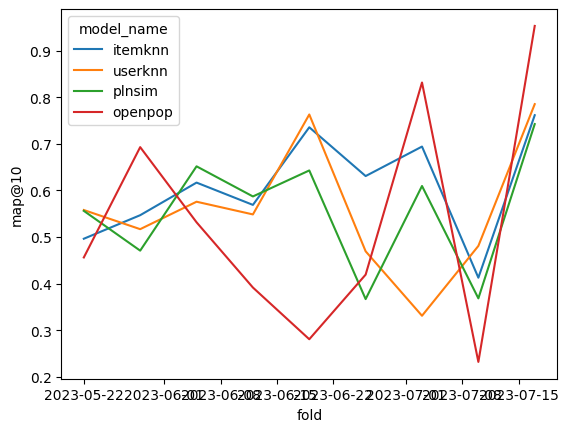

In [10]:
sns.lineplot(rdf_test.reset_index(), x='fold', y='map@10', hue='model_name')

In [11]:
model_suffixes = [
    'avg', # Using the hparams that optimize the average results
    'test', # Using the hparams that optimize that fold
    'valid', # Using the hparams that optimized the previous fold on the next fold (CVTT)
]

In [12]:
paths.get_model_results(MODEL_NAMES[0]+'-best-val', ORG_NAME, SPLITS_FREQ, SPLITS_NORMALIZE)

,,,fold_t,time_train,time_rec,open_proposals,min_recs,avg_recs,precision@1,precision@3,precision@5,precision@10,...,recall@10,recall@15,recall@100,r-precision@1,r-precision@3,r-precision@5,r-precision@10,r-precision@15,r-precision@100,time_eval
fold,k,window_size,,,,,,,,,,,,,,,,,,,,,
2023-05-15,1,7d,2023-05-15,0.007447,0.253381,13,1,5.737452,0.776062,0.667954,0.545946,0.363320,...,0.969393,1.000000,1.0,0.413684,0.740494,0.847857,0.929851,0.938788,0.938788,0.359887
2023-05-22,9,7d,2023-05-22,0.008410,0.380533,32,1,20.579288,0.485437,0.472492,0.436246,0.394822,...,0.613114,0.760444,1.0,0.292467,0.445129,0.527174,0.641879,0.716137,0.775330,1.225754
2023-05-29,4,7d,2023-05-29,0.018302,0.618142,31,1,20.691438,0.500808,0.471729,0.453312,0.388368,...,0.675014,0.777092,1.0,0.323564,0.472068,0.566762,0.653108,0.700404,0.738013,2.834871
2023-06-05,2,14d,2023-06-05,0.065472,1.155548,25,1,14.086324,0.560621,0.545748,0.538118,0.491659,...,0.705779,0.847109,1.0,0.302022,0.443617,0.565347,0.732957,0.803281,0.825980,3.713088
2023-06-12,6,14d,2023-06-12,0.094112,1.743260,23,1,13.761174,0.534356,0.493218,0.466444,0.424550,...,0.677451,0.844839,1.0,0.270493,0.459734,0.580444,0.739916,0.797209,0.831261,3.564492
2023-06-19,1,7d,2023-06-19,0.061567,1.122870,19,1,12.411872,0.782648,0.629833,0.533881,0.414521,...,0.862996,0.956210,1.0,0.431916,0.665134,0.755141,0.849648,0.890847,0.905554,2.543982
2023-06-26,1,7d,2023-06-26,0.050541,1.259720,22,1,14.352895,0.692488,0.567293,0.601095,0.488028,...,0.742492,0.969475,1.0,0.209715,0.385305,0.593065,0.752769,0.787643,0.796415,5.186721
2023-07-03,1,7d,2023-07-03,0.166977,1.334551,30,1,18.978957,0.767612,0.636780,0.566880,0.479506,...,0.635961,0.798289,1.0,0.332352,0.448567,0.523824,0.641042,0.751740,0.824033,4.800728
2023-07-10,10,7d,2023-07-10,0.083697,4.020334,33,1,15.097138,0.364062,0.259585,0.270006,0.294662,...,0.731235,0.885077,1.0,0.582294,0.642279,0.691758,0.810450,0.847613,0.867360,8.673960
